In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

# Computing accelerations with numba
Numba is used to compute accelerations for one tstep. 

In [2]:
df = pd.read_csv('numba_timings.csv')
df

,n_particles,direct_slow,direct_fast,vectorized_slow,vectorized_fast,direct_parallel
0,250,0.275979,0.005325,0.008298,0.005843,0.000678
1,250,0.243673,0.005861,0.004197,0.009654,0.000647
2,250,0.242618,0.006619,0.005778,0.010507,0.000589
3,250,0.242298,0.005432,0.005088,0.009657,0.000561
4,250,0.258218,0.005097,0.004650,0.006438,0.000591
...,...,...,...,...,...,...
795,2000,18.761201,0.372528,0.302047,0.450370,0.036297
796,2000,18.694930,0.389331,0.282184,0.447370,0.044076
797,2000,21.444264,0.368891,0.280138,0.433559,0.036481
798,2000,22.757843,0.368927,0.304713,0.447264,0.046268


In [3]:
group = df.groupby("n_particles").agg(["mean", "std"])
group.head()

direct_slow           direct_fast           vectorized_slow  \
                   mean       std        mean       std            mean   
n_particles                                                               
250            0.253742  0.014422    0.005096  0.000194        0.004399   
500            1.022648  0.038492    0.020907  0.001014        0.023280   
750            2.441655  0.393710    0.048656  0.003595        0.049029   
1000           4.201635  0.122819    0.087678  0.004923        0.081202   
1250           6.758892  0.157776    0.134140  0.005904        0.126526   

                      vectorized_fast           direct_parallel            
                  std            mean       std            mean       std  
n_particles                                                                
250          0.001146        0.006390  0.001000        0.000629  0.000118  
500          0.003347        0.026808  0.003553        0.001935  0.000227  
750          0.005912        0.064523  0.005838        0.004053  0.000402  
1000         0.007404        0.107914  0.008187        0.007041  0.000604  
1250         0.012410        0.172445  0.012928        0.014518  0.002672

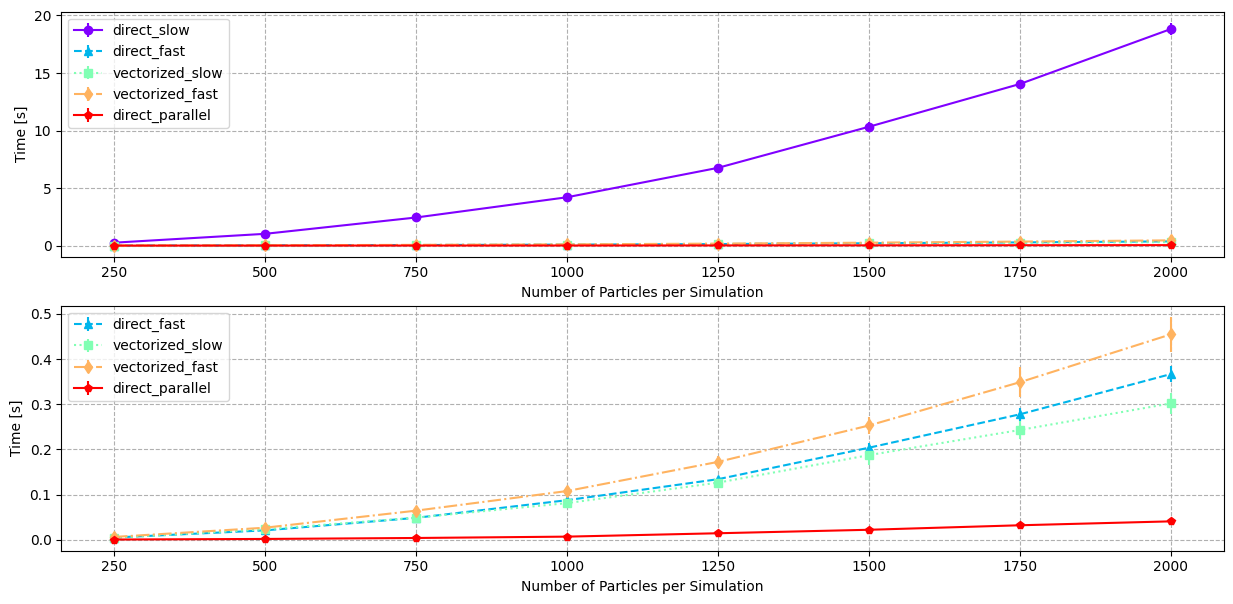

In [4]:
fig, axs = plt.subplots(2,1,figsize=(15, 7))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 5)]


i=0
n_particles = np.arange(250,2250,250)
axs[0].errorbar(n_particles, group["direct_slow"].values[:, 0], yerr=group["direct_slow"].values[:, 1], marker="o", label="direct_slow", c=colors[i])
axs[0].errorbar(n_particles, group["direct_fast"].values[:, 0], yerr=group["direct_fast"].values[:, 1], marker="^", linestyle="--", label="direct_fast", c=colors[i+1])
axs[0].errorbar(n_particles, group["vectorized_slow"].values[:, 0], yerr=group["vectorized_slow"].values[:, 1], marker="s", linestyle=":", label="vectorized_slow", c=colors[i+2])
axs[0].errorbar(n_particles, group["vectorized_fast"].values[:, 0], yerr=group["vectorized_fast"].values[:, 1], marker="d", linestyle="-.", label="vectorized_fast", c=colors[i+3])
axs[0].errorbar(n_particles, group["direct_parallel"].values[:, 0], yerr=group["direct_parallel"].values[:, 1], marker="p", linestyle="-", label="direct_parallel", c=colors[i+4])
    

  
# Set labels and title
axs[0].set_xlabel('Number of Particles per Simulation')
axs[0].set_ylabel('Time [s]')
axs[0].grid(linestyle='--')
axs[0].legend(handles=axs[0].get_legend_handles_labels()[0][:5], labels=axs[0].get_legend_handles_labels()[1][:5], loc="upper left")

############################################
axs[1].errorbar(n_particles, group["direct_fast"].values[:, 0], yerr=group["direct_fast"].values[:, 1], marker="^", linestyle="--", label="direct_fast", c=colors[i+1])
axs[1].errorbar(n_particles, group["vectorized_slow"].values[:, 0], yerr=group["vectorized_slow"].values[:, 1], marker="s", linestyle=":", label="vectorized_slow", c=colors[i+2])
axs[1].errorbar(n_particles, group["vectorized_fast"].values[:, 0], yerr=group["vectorized_fast"].values[:, 1], marker="d", linestyle="-.", label="vectorized_fast", c=colors[i+3])
axs[1].errorbar(n_particles, group["direct_parallel"].values[:, 0], yerr=group["direct_parallel"].values[:, 1], marker="p", linestyle="-", label="direct_parallel", c=colors[i+4])
    

  
# Set labels and title
axs[1].set_xlabel('Number of Particles per Simulation')
axs[1].set_ylabel('Time [s]')
axs[1].grid(linestyle='--')
axs[1].legend(handles=axs[1].get_legend_handles_labels()[0][:5], labels=axs[1].get_legend_handles_labels()[1][:5], loc="upper left")


plt.savefig("numba_timings.png")